In [173]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# Target - Customer Lifetime Value

<AxesSubplot:>

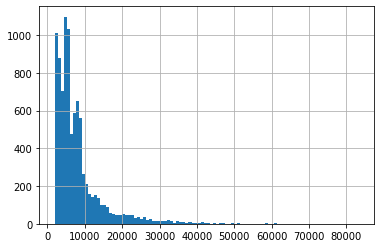

In [7]:
df['Customer Lifetime Value'].hist(bins=100)

<AxesSubplot:>

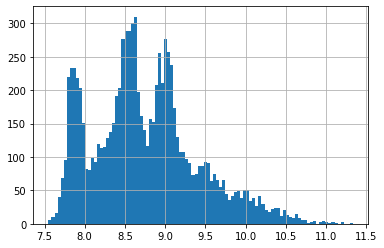

In [8]:
df['Customer Lifetime Value'].apply(np.log).hist(bins=100)

In [68]:
df['CLV_log'] = df['Customer Lifetime Value'].apply(np.log)

# Vehicle Size 

In [39]:
df['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [40]:
df['Vehicle Size'] = df['Vehicle Size'].map({'Small': 0, 'Medsize': 1, 'Large': 2})

# Vehicle Class

In [41]:
df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [42]:
vehicle_class_dict = {'Two-Door Car': 0, 'Four-Door Car': 1, 
                      'SUV': 2, 'Sports Car': 3, 'Luxury Car': 4, 'Luxury SUV': 5}

In [43]:
df['Vehicle Class'] = df['Vehicle Class'].map(vehicle_class_dict)

# Total Claim Amount

<AxesSubplot:>

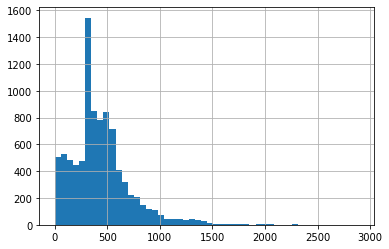

In [11]:
df['Total Claim Amount'].hist(bins=50)

<AxesSubplot:>

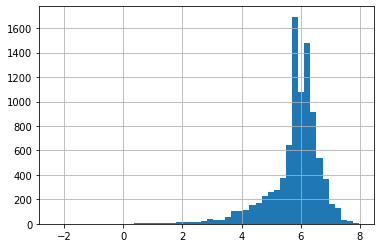

In [25]:
df['Total Claim Amount'].apply(np.log).hist(bins=50)

# Sales Channel

In [44]:
df['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [50]:
le = LabelEncoder()

In [55]:
df['Sales Channel'] = le.fit_transform(df['Sales Channel'])

In [56]:
df['Sales Channel'].value_counts()

0    3477
1    2567
2    1765
3    1325
Name: Sales Channel, dtype: int64

# Renew Offer Type

In [31]:
df['Renew Offer Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [58]:
df['Renew Offer Type'] = df['Renew Offer Type'].map({'Offer1': 0, 'Offer2': 1, 
                                                    'Offer3': 2, 'Offer4': 3})

# Policy

In [59]:
df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [60]:
df['Policy'] = le.fit_transform(df['Policy'])

# Policy Type

In [34]:
df['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [65]:
df['Policy Type'] = le.fit_transform(df['Policy Type'])

# Number of Policies 

<AxesSubplot:>

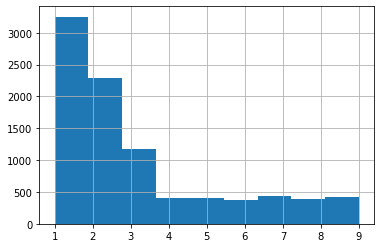

In [62]:
df['Number of Policies'].hist(bins=9)

# Number of Open Complaints

In [63]:
df['Number of Open Complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64

In [22]:
df['Number of Open Complaints'].sum()

3511

<AxesSubplot:>

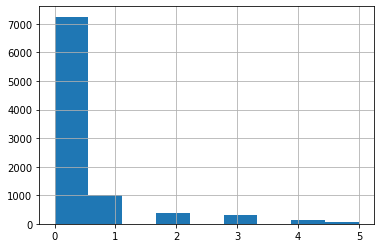

In [22]:
df['Number of Open Complaints'].hist(bins=9)

In [25]:
df['n_open_complaints_exceeds_one'] = (df['Number of Open Complaints'] > 1).astype(int)

<AxesSubplot:>

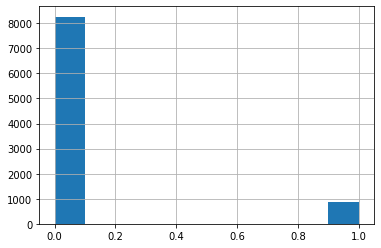

In [26]:
df['n_open_complaints_exceeds_one'].hist()

# Months Since Policy Inception

<AxesSubplot:>

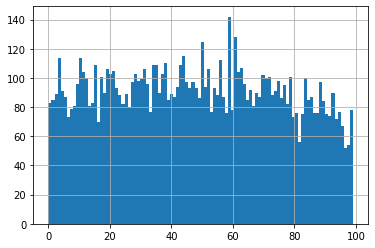

In [67]:
df['Months Since Policy Inception'].hist(bins=100)

# Months Since Last Claim

<AxesSubplot:>

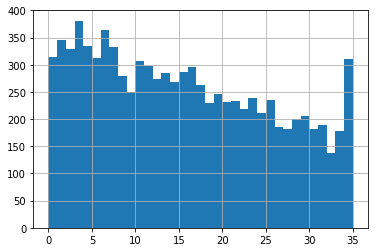

In [68]:
df['Months Since Last Claim'].hist(bins=35)

# Monthly Premium Auto

<AxesSubplot:>

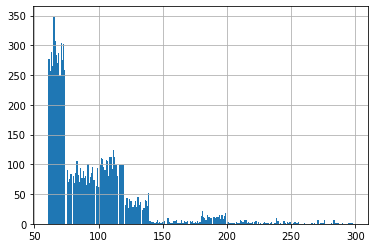

In [69]:
df['Monthly Premium Auto'].hist(bins=250)

In [ ]:
# Marital Status  

In [70]:
df['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [44]:
# Gender

In [71]:
df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [92]:
df['Gender'] = df['Gender'].map({'F': 1, 'M': 0})

# Employment status

In [73]:
df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

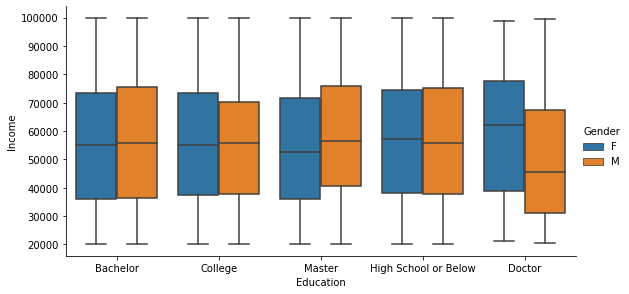

In [66]:
#only employed
mask_employed = df['EmploymentStatus'] == 'Employed'
sns.catplot(data=df[mask_employed], x='Education', y='Income', kind='box', hue='Gender', height=4, aspect=2)

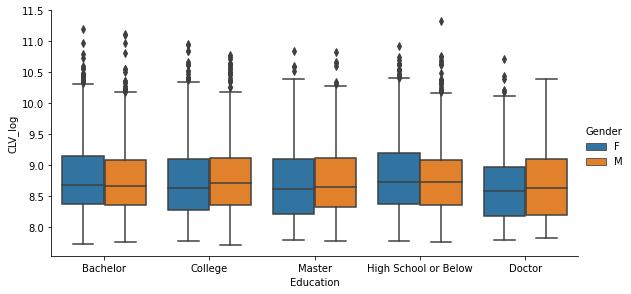

In [69]:
#only employed
sns.catplot(data=df[mask_employed], x='Education', y='CLV_log', kind='box', hue='Gender', height=4, aspect=2)

# Education

In [47]:
df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [86]:
df[mask_employed].groupby('Education')['Income'].apply(np.mean)

Education
Bachelor                56456.954759
College                 55922.259615
Doctor                  55047.546185
High School or Below    57056.515707
Master                  56301.801802
Name: Income, dtype: float64

In [74]:
map_ed_dict = {'Bachelor': 0, 'College': 1, 'High School or Below': 2,
               'Master': 3, 'Doctor': 4}

In [75]:
df['Education'] = df['Education'].map(map_ed_dict)

# Effective To Date  

In [76]:
df['Effective To Date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: Effective To Date, Length: 9134, dtype: object

# Coverage

In [77]:
df['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [78]:
df['Coverage'].map({'Basic': 0, 'Extended': 1, 'Premium': 2})

0       0
1       1
2       2
3       0
4       0
       ..
9129    0
9130    1
9131    1
9132    1
9133    1
Name: Coverage, Length: 9134, dtype: int64

# Response

In [79]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [80]:
df['Response'].map({'No': 0, 'Yes': 1})

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Response, Length: 9134, dtype: int64

# Location code

In [81]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

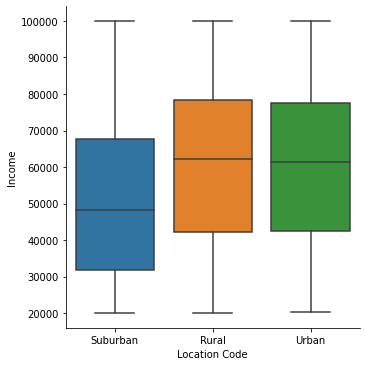

In [91]:
sns.catplot(x='Location Code', y='Income', data = df[mask_employed], kind='box')

# State

In [82]:
df['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

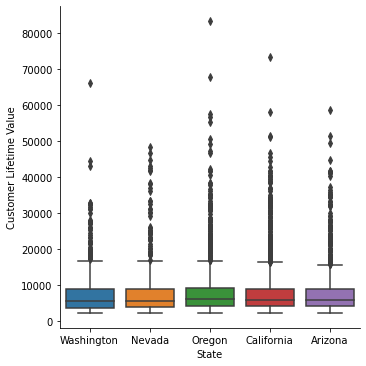

In [96]:
sns.catplot(x='State', y='Customer Lifetime Value', data = df[mask_employed], kind='box')

In [83]:
df['State'] = le.fit_transform(df['State'])

# Modeling

In [84]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,4,2763.519279,No,Basic,0,2/24/11,Employed,F,56274,...,5,0,1,0,2,0,0,384.811147,0,1
1,QZ44356,0,6979.535903,No,Extended,0,1/31/11,Unemployed,F,0,...,42,0,8,1,5,2,0,1131.464935,1,1
2,AI49188,2,12887.431650,No,Premium,0,2/19/11,Employed,F,48767,...,38,0,2,1,5,0,0,566.472247,0,1
3,WW63253,1,7645.861827,No,Basic,0,1/20/11,Unemployed,M,0,...,65,0,7,0,1,0,2,529.881344,2,1
4,HB64268,4,2813.692575,No,Basic,0,2/3/11,Employed,M,43836,...,44,0,1,1,3,0,0,138.130879,1,1


In [85]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [108]:
features = ['State', 
            #'Response', 'Coverage',
       'Education', 
            #'Effective To Date', 
            #'EmploymentStatus', 
            #'Gender',
       'Income', 
            #'Location Code', 'Marital Status', 
            'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']

In [109]:
X = df[features]
y = df['Customer Lifetime Value']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [111]:
def calc_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean( np.abs( (y_true - y_pred)/y_true ) )

metrics = {
           'MSE': mean_squared_error,
           'MAE': mean_absolute_error,
           'MAPE': calc_mape,
           'R2': r2_score
          }

def get_metrics(y_true, y_pred):
    output = {}
    for mname, metric in metrics.items():
        print(mname, metric(y_true, y_pred))
        output[mname] = metric(y_true, y_pred)
    return output

In [174]:
regressors = {
          'skl': GradientBoostingRegressor(),
          'xgb': XGBRegressor(),
          'cat': CatBoostRegressor(),
          'lgbm': LGBMRegressor(),
         }

In [175]:
results = {}
for key, model in regressors.items():
    print(key)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res = get_metrics(y_test, y_pred)
    results[key] = res

skl
MSE 14688917.545442339
MAE 1755.4139192892044
MAPE 0.15127272669228564
R2 0.6771297371665329
xgb
MSE 16207078.273049396
MAE 1889.61348453688
MAPE 0.19523528766668796
R2 0.6437597525077228
cat
Learning rate set to 0.05388
0:	learn: 6689.4068266	total: 5.2ms	remaining: 5.19s
1:	learn: 6470.6484844	total: 9.65ms	remaining: 4.81s
2:	learn: 6271.1441589	total: 13.1ms	remaining: 4.36s
3:	learn: 6081.6902605	total: 16.7ms	remaining: 4.15s
4:	learn: 5902.4365192	total: 20.5ms	remaining: 4.09s
5:	learn: 5735.5786762	total: 24.4ms	remaining: 4.05s
6:	learn: 5583.0982083	total: 28.1ms	remaining: 3.98s
7:	learn: 5442.4947902	total: 31.9ms	remaining: 3.96s
8:	learn: 5308.9065366	total: 37.4ms	remaining: 4.12s
9:	learn: 5190.8989322	total: 41.3ms	remaining: 4.09s
10:	learn: 5075.5044934	total: 44.8ms	remaining: 4.03s
11:	learn: 4972.4438221	total: 48.4ms	remaining: 3.99s
12:	learn: 4875.0335320	total: 51.8ms	remaining: 3.93s
13:	learn: 4783.3349381	total: 55.5ms	remaining: 3.91s
14:	learn: 4700.

163:	learn: 3401.3497856	total: 717ms	remaining: 3.66s
164:	learn: 3399.6331560	total: 722ms	remaining: 3.65s
165:	learn: 3398.3301845	total: 726ms	remaining: 3.65s
166:	learn: 3396.4592204	total: 733ms	remaining: 3.66s
167:	learn: 3394.7691630	total: 742ms	remaining: 3.67s
168:	learn: 3393.1157191	total: 744ms	remaining: 3.66s
169:	learn: 3391.6329481	total: 748ms	remaining: 3.65s
170:	learn: 3389.0368229	total: 753ms	remaining: 3.65s
171:	learn: 3386.3228815	total: 758ms	remaining: 3.65s
172:	learn: 3382.1826763	total: 762ms	remaining: 3.64s
173:	learn: 3379.8015820	total: 765ms	remaining: 3.63s
174:	learn: 3378.2002276	total: 767ms	remaining: 3.62s
175:	learn: 3375.2708970	total: 769ms	remaining: 3.6s
176:	learn: 3371.5632812	total: 773ms	remaining: 3.6s
177:	learn: 3368.1877941	total: 776ms	remaining: 3.58s
178:	learn: 3366.1900933	total: 779ms	remaining: 3.57s
179:	learn: 3363.2715990	total: 782ms	remaining: 3.56s
180:	learn: 3361.4442641	total: 784ms	remaining: 3.55s
181:	learn: 

368:	learn: 3028.5862964	total: 1.7s	remaining: 2.9s
369:	learn: 3026.9584240	total: 1.7s	remaining: 2.9s
370:	learn: 3025.0934479	total: 1.71s	remaining: 2.9s
371:	learn: 3023.8350543	total: 1.72s	remaining: 2.9s
372:	learn: 3023.3186182	total: 1.72s	remaining: 2.89s
373:	learn: 3021.4449466	total: 1.72s	remaining: 2.88s
374:	learn: 3019.8107871	total: 1.73s	remaining: 2.88s
375:	learn: 3018.2066238	total: 1.73s	remaining: 2.87s
376:	learn: 3016.7522103	total: 1.74s	remaining: 2.87s
377:	learn: 3014.7905192	total: 1.74s	remaining: 2.87s
378:	learn: 3013.5157625	total: 1.75s	remaining: 2.86s
379:	learn: 3011.3611058	total: 1.75s	remaining: 2.85s
380:	learn: 3010.3098951	total: 1.75s	remaining: 2.85s
381:	learn: 3008.5637397	total: 1.75s	remaining: 2.84s
382:	learn: 3006.8758578	total: 1.76s	remaining: 2.84s
383:	learn: 3006.1655600	total: 1.76s	remaining: 2.83s
384:	learn: 3005.1049440	total: 1.77s	remaining: 2.82s
385:	learn: 3003.9289633	total: 1.77s	remaining: 2.82s
386:	learn: 3002

555:	learn: 2771.5208780	total: 2.44s	remaining: 1.95s
556:	learn: 2770.0761417	total: 2.44s	remaining: 1.94s
557:	learn: 2767.1566641	total: 2.45s	remaining: 1.94s
558:	learn: 2765.7958430	total: 2.46s	remaining: 1.94s
559:	learn: 2764.1642340	total: 2.46s	remaining: 1.93s
560:	learn: 2763.3559311	total: 2.47s	remaining: 1.93s
561:	learn: 2762.0796088	total: 2.47s	remaining: 1.93s
562:	learn: 2761.0772888	total: 2.48s	remaining: 1.92s
563:	learn: 2759.1320613	total: 2.48s	remaining: 1.92s
564:	learn: 2757.9748878	total: 2.48s	remaining: 1.91s
565:	learn: 2756.4266339	total: 2.49s	remaining: 1.91s
566:	learn: 2755.6097351	total: 2.49s	remaining: 1.91s
567:	learn: 2753.8562476	total: 2.5s	remaining: 1.9s
568:	learn: 2753.1530907	total: 2.5s	remaining: 1.9s
569:	learn: 2751.7710738	total: 2.51s	remaining: 1.89s
570:	learn: 2750.4607952	total: 2.51s	remaining: 1.89s
571:	learn: 2749.3977328	total: 2.51s	remaining: 1.88s
572:	learn: 2748.1997741	total: 2.52s	remaining: 1.88s
573:	learn: 27

751:	learn: 2561.2986056	total: 3.15s	remaining: 1.04s
752:	learn: 2560.6367578	total: 3.16s	remaining: 1.04s
753:	learn: 2560.0405378	total: 3.17s	remaining: 1.03s
754:	learn: 2558.2172263	total: 3.17s	remaining: 1.03s
755:	learn: 2555.6262391	total: 3.18s	remaining: 1.02s
756:	learn: 2554.7487976	total: 3.18s	remaining: 1.02s
757:	learn: 2553.8832769	total: 3.19s	remaining: 1.02s
758:	learn: 2553.1493767	total: 3.19s	remaining: 1.01s
759:	learn: 2551.9188570	total: 3.2s	remaining: 1.01s
760:	learn: 2551.6590141	total: 3.2s	remaining: 1s
761:	learn: 2550.2460825	total: 3.2s	remaining: 1s
762:	learn: 2548.4198770	total: 3.21s	remaining: 996ms
763:	learn: 2547.0479751	total: 3.21s	remaining: 991ms
764:	learn: 2545.9368393	total: 3.21s	remaining: 987ms
765:	learn: 2545.5689107	total: 3.22s	remaining: 982ms
766:	learn: 2545.3562631	total: 3.22s	remaining: 978ms
767:	learn: 2544.7840484	total: 3.22s	remaining: 973ms
768:	learn: 2544.0775354	total: 3.22s	remaining: 969ms
769:	learn: 2543.05

914:	learn: 2408.7739952	total: 3.71s	remaining: 344ms
915:	learn: 2408.2997896	total: 3.71s	remaining: 341ms
916:	learn: 2407.6510946	total: 3.73s	remaining: 337ms
917:	learn: 2406.9576627	total: 3.73s	remaining: 333ms
918:	learn: 2406.6360973	total: 3.73s	remaining: 329ms
919:	learn: 2405.8933434	total: 3.73s	remaining: 325ms
920:	learn: 2404.8111629	total: 3.74s	remaining: 321ms
921:	learn: 2403.8137438	total: 3.74s	remaining: 317ms
922:	learn: 2402.0468641	total: 3.75s	remaining: 313ms
923:	learn: 2401.0335021	total: 3.75s	remaining: 309ms
924:	learn: 2400.2247375	total: 3.76s	remaining: 305ms
925:	learn: 2398.2810151	total: 3.76s	remaining: 300ms
926:	learn: 2397.6659271	total: 3.76s	remaining: 296ms
927:	learn: 2396.4345384	total: 3.77s	remaining: 292ms
928:	learn: 2396.1014959	total: 3.77s	remaining: 288ms
929:	learn: 2394.5858908	total: 3.77s	remaining: 284ms
930:	learn: 2393.8466110	total: 3.78s	remaining: 280ms
931:	learn: 2392.3076529	total: 3.78s	remaining: 276ms
932:	learn

In [176]:
regressors['cat'].predict(X_test)

array([ 2339.09659366, 18599.12122016, 13660.60523502, ...,
       10773.77361747,  7106.57066661,  5196.91219712])

In [177]:
result_df = df.from_dict(results)

In [178]:
result_df

,skl,xgb,cat,lgbm
MSE,1.468892e+07,1.620708e+07,1.477163e+07,1.534471e+07
MAE,1.755414e+03,1.889613e+03,1.778488e+03,1.657762e+03
MAPE,1.512727e-01,1.952353e-01,1.668466e-01,1.375842e-01
R2,6.771297e-01,6.437598e-01,6.753117e-01,6.627151e-01


# Hyperparam Grid Search

In [179]:
parameters = {'subsample': [0.66, 0.8, 0.9, 1.0], 
              'n_estimators': [500, 1000, 1500], 
              'max_depth': [4, 6, 8, 10, 12]}

In [181]:
models = {
          'skl': GradientBoostingRegressor(),
          'xgb': XGBRegressor(),
          'cat': CatBoostRegressor(),
          'lgbm': LGBMRegressor(),
         }

In [182]:
grid_search_models = {k: GridSearchCV(m, parameters, scoring='r2', n_jobs=-1) 
                      for k, m in models.items()}

In [ ]:
for k, m in grid_search_models.items():
    m.fit(X, y)

In [161]:
hyper_models['xgb'].best_score_

0.6179478568475173

In [162]:
hyper_models['cat'].best_score_

0.6962729819108313

In [163]:
hyper_models['lgbm'].best_score_

0.6866618461356941